In [9]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins


# Configura√ß√µes de visualiza√ß√£o
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
df = load_penguins()
df.head()


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [10]:
# Vis√£o geral das colunas, tipos de dados e valores nulos
df.info()

# Estat√≠sticas descritivas das colunas num√©ricas
df.describe()

# Contagem de valores nulos por coluna
df.isnull().sum()

# Quantidade de valores √∫nicos por coluna
df.nunique()

# Verificar a distribui√ß√£o de esp√©cies
df["species"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

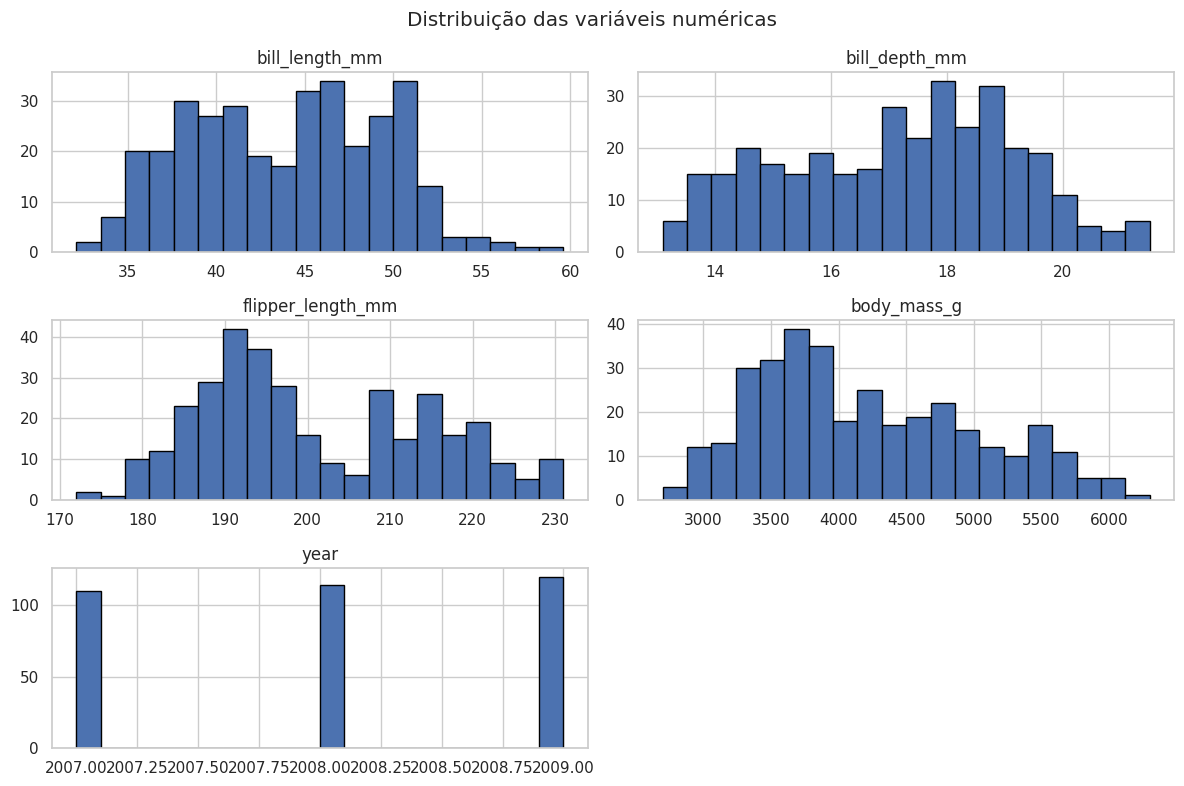

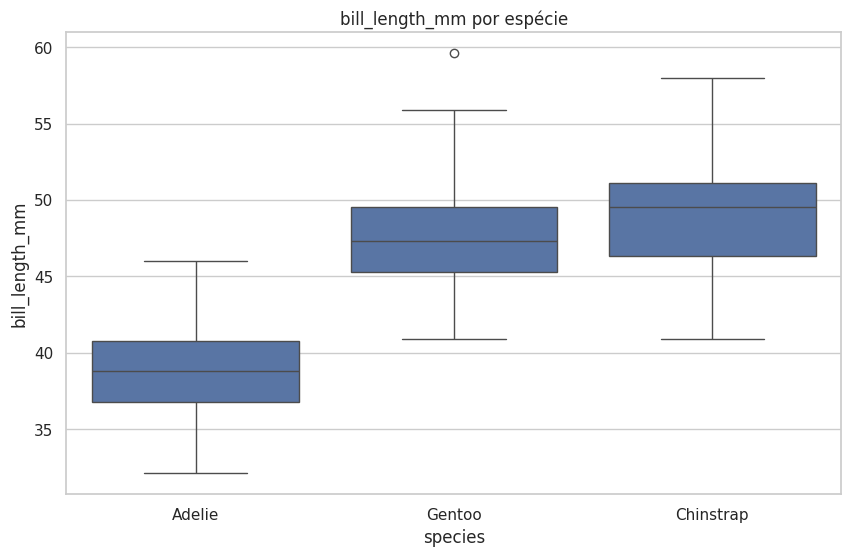

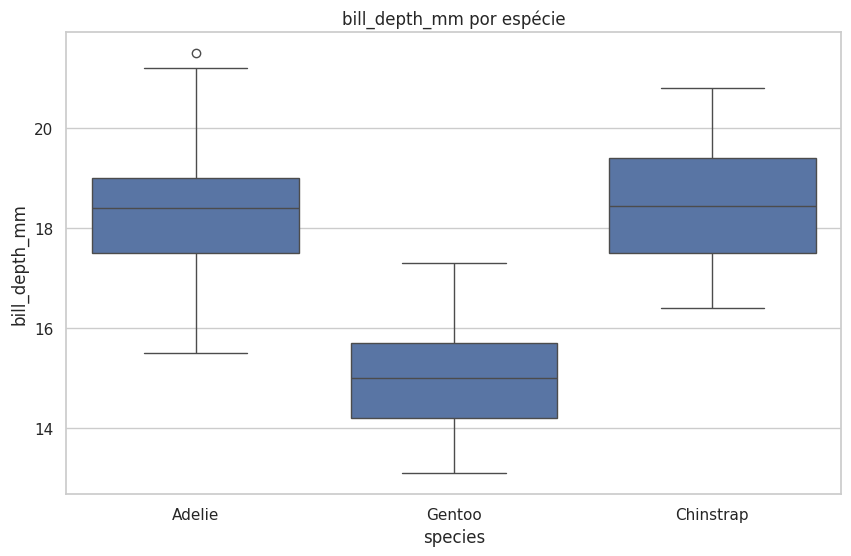

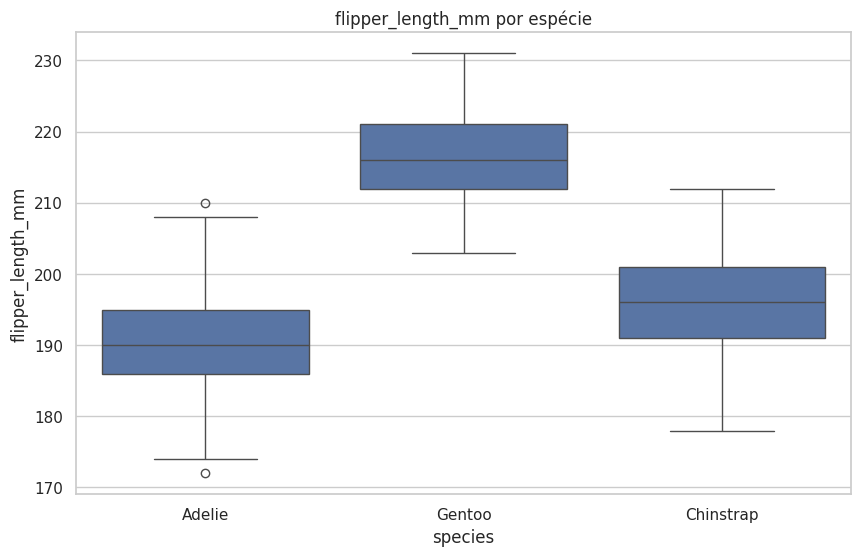

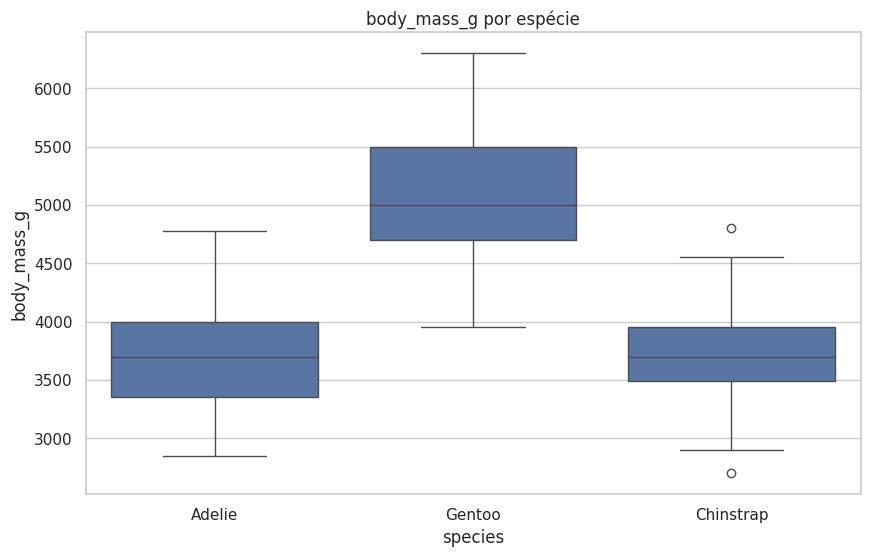

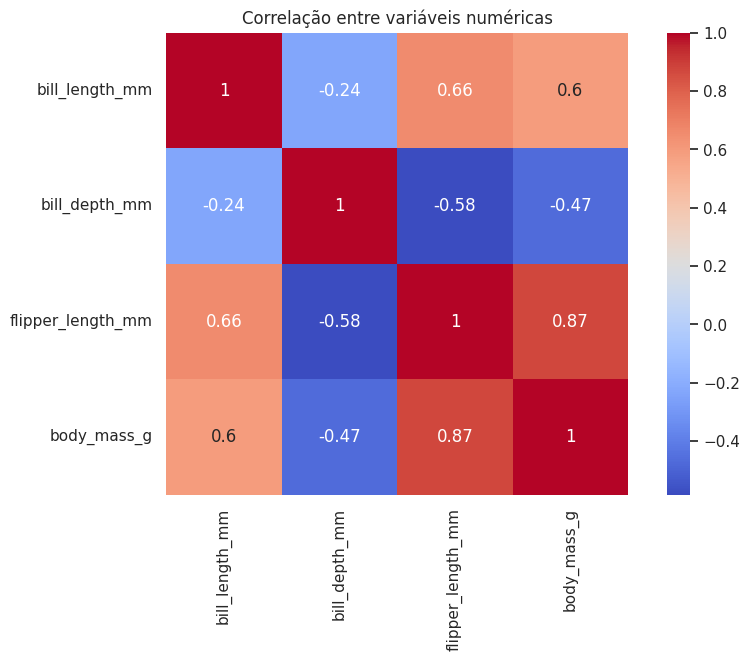

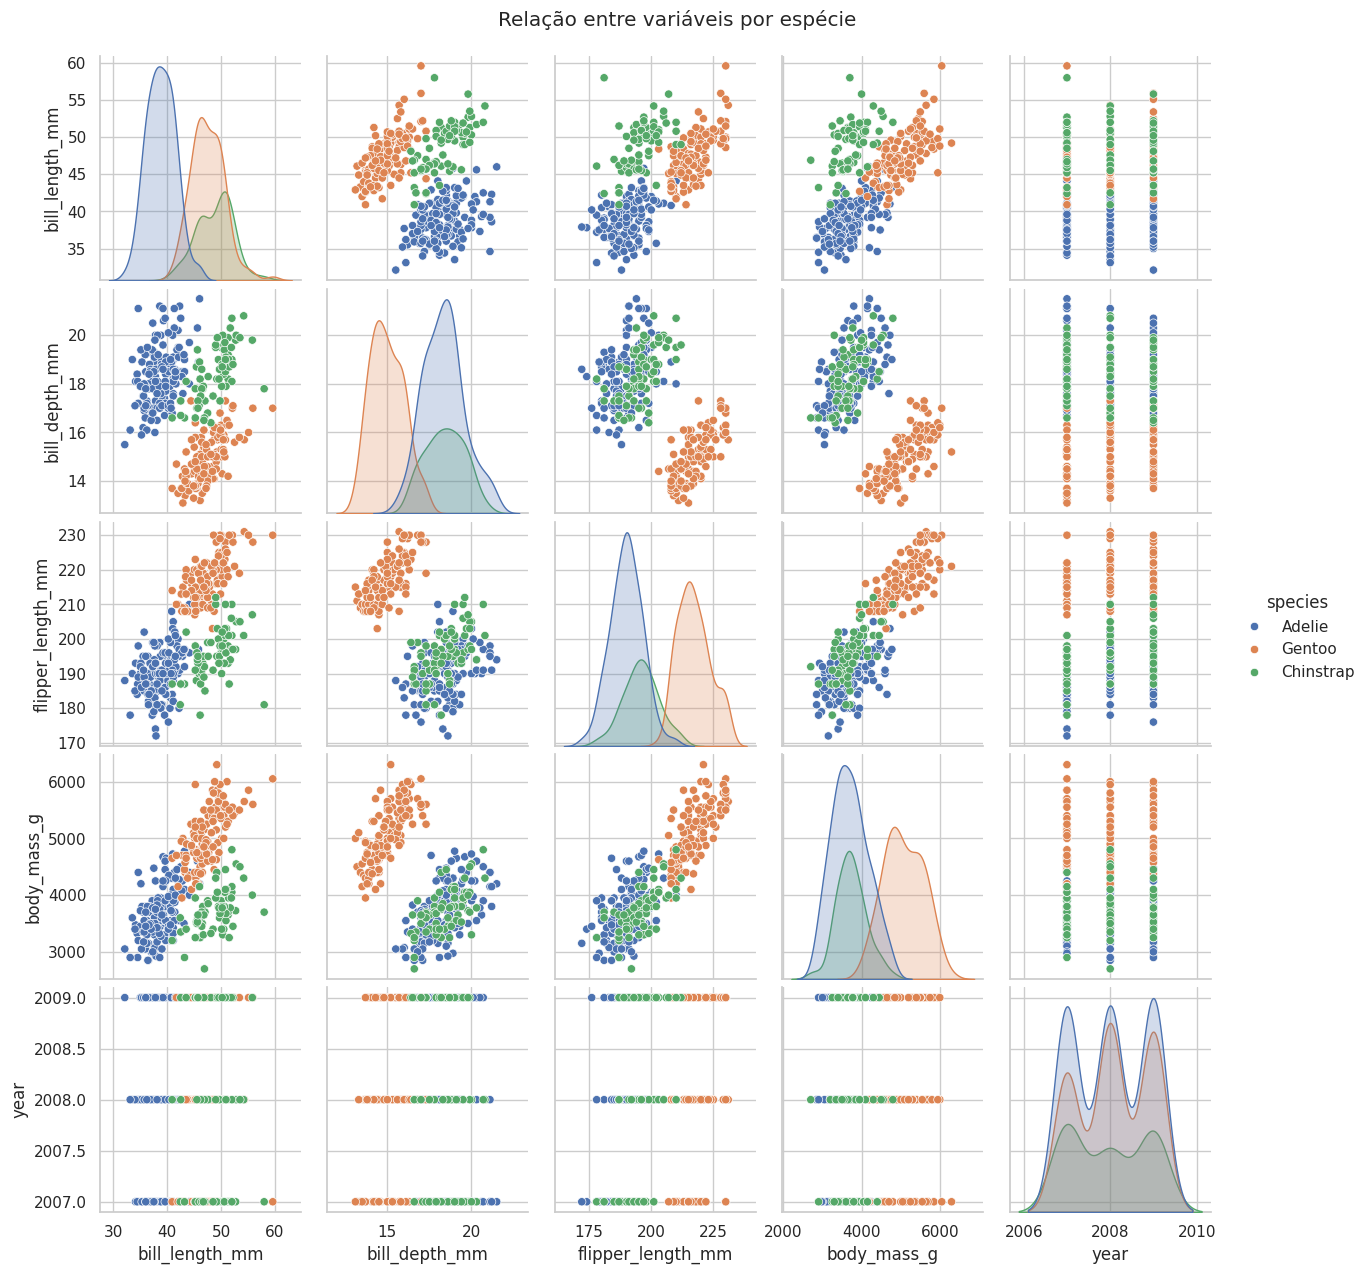

In [11]:
# Histograma para as vari√°veis num√©ricas
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribui√ß√£o das vari√°veis num√©ricas")
plt.tight_layout()
plt.show()

# Boxplots por esp√©cie para detec√ß√£o de outliers
variaveis_numericas = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for var in variaveis_numericas:
    sns.boxplot(data=df, x="species", y=var)
    plt.title(f"{var} por esp√©cie")
    plt.show()

# Mapa de calor de correla√ß√£o
df_corr = df[variaveis_numericas].corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correla√ß√£o entre vari√°veis num√©ricas")
plt.show()

# Rela√ß√µes entre vari√°veis num√©ricas coloridas por esp√©cie
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Rela√ß√£o entre vari√°veis por esp√©cie", y=1.02)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# C√≥pia do DataFrame original para n√£o alterar o original
df_tratado = df.copy()

# ‚û§ Remover colunas irrelevantes ou com muitos nulos
df_tratado.drop(columns=['year'], inplace=True)

# ‚û§ Remover linhas com valores ausentes
df_tratado.dropna(inplace=True)

# ‚û§ Convers√£o de vari√°veis categ√≥ricas em num√©ricas (One-Hot Encoding)
df_tratado = pd.get_dummies(df_tratado, columns=["island", "sex"], drop_first=True)

# ‚û§ Cria√ß√£o de bins para body_mass_g (Ex: leve, m√©dio, pesado)
df_tratado["peso_categoria"] = pd.cut(
    df_tratado["body_mass_g"],
    bins=[0, 3500, 4500, np.inf],
    labels=["leve", "m√©dio", "pesado"]
)

# ‚û§ Codificar nova vari√°vel categ√≥rica (peso_categoria)
df_tratado = pd.get_dummies(df_tratado, columns=["peso_categoria"], drop_first=True)

# ‚û§ Separar vari√°veis preditoras e alvo
X = df_tratado.drop(columns=["species"])
y = df_tratado["species"]

# ‚û§ Normaliza√ß√£o (padroniza√ß√£o Z-score)
colunas_numericas = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
scaler = StandardScaler()
X[colunas_numericas] = scaler.fit_transform(X[colunas_numericas])

# Verifica√ß√£o final
X.head()


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -0.896042       0.780732          -1.426752    -0.568475   
1       -0.822788       0.119584          -1.069474    -0.506286   
2       -0.676280       0.424729          -0.426373    -1.190361   
4       -1.335566       1.085877          -0.569284    -0.941606   
5       -0.859415       1.747026          -0.783651    -0.692852   

   island_Dream  island_Torgersen  sex_male  peso_categoria_m√©dio  \
0         False              True      True                  True   
1         False              True     False                  True   
2         False              True     False                 False   
4         False              True     False                 False   
5         False              True      True                  True   

   peso_categoria_pesado  
0                  False  
1                  False  
2                  False  
4                  False  
5                  False

In [14]:
# ‚û§ Separar os dados (80% treino, 20% teste), estratificando por esp√©cie
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Treinamento: {X_treino.shape}, Teste: {X_teste.shape}")


Treinamento: (266, 9), Teste: (67, 9)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Modelos a serem testados
modelos = {
    "Regress√£o Log√≠stica": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Treinamento dos modelos
for nome, modelo in modelos.items():
    modelo.fit(X_treino, y_treino)
    print(f"‚úÖ Modelo {nome} treinado.")


‚úÖ Modelo Regress√£o Log√≠stica treinado.
‚úÖ Modelo Random Forest treinado.
‚úÖ Modelo KNN treinado.



üîç Avaliando: Regress√£o Log√≠stica
Acur√°cia: 1.0000

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



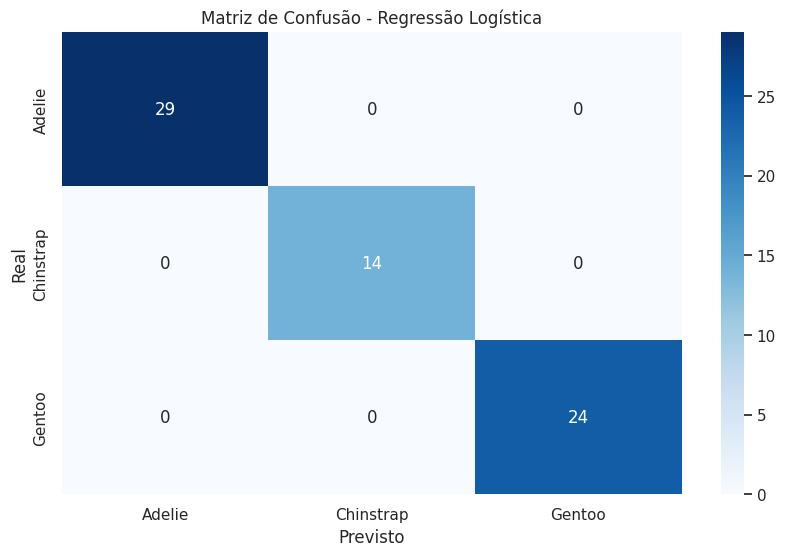


üîç Avaliando: Random Forest
Acur√°cia: 1.0000

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



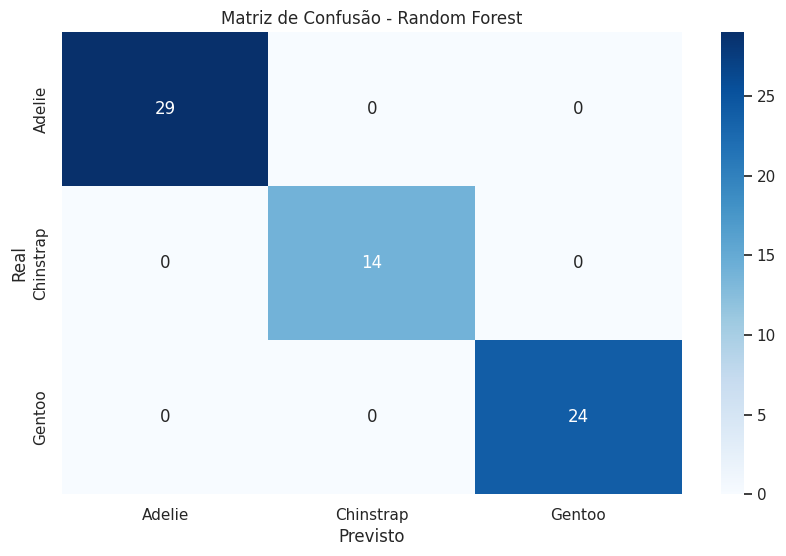


üîç Avaliando: KNN
Acur√°cia: 1.0000

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



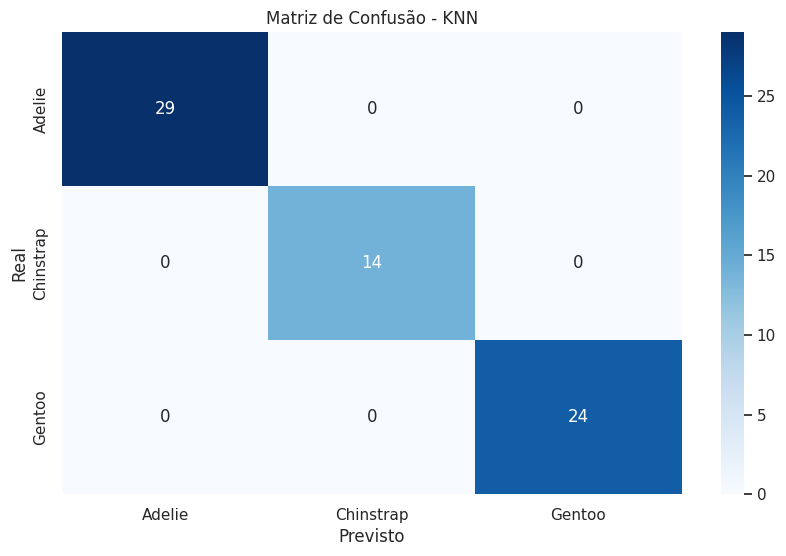

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, nome):
    print(f"\nüîç Avaliando: {nome}")
    y_pred = modelo.predict(X_teste)
    
    # M√©tricas
    acc = accuracy_score(y_teste, y_pred)
    print(f"Acur√°cia: {acc:.4f}")
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_teste, y_pred))

    # Matriz de confus√£o
    cm = confusion_matrix(y_teste, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title(f"Matriz de Confus√£o - {nome}")
    plt.ylabel("Real")
    plt.xlabel("Previsto")
    plt.show()

# Avaliar todos os modelos treinados
for nome, modelo in modelos.items():
    avaliar_modelo(modelo, nome)


Melhores hiperpar√¢metros:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Melhor acur√°cia (valida√ß√£o cruzada):
0.9924528301886791

üîç Avaliando: Random Forest Otimizado
Acur√°cia: 1.0000

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



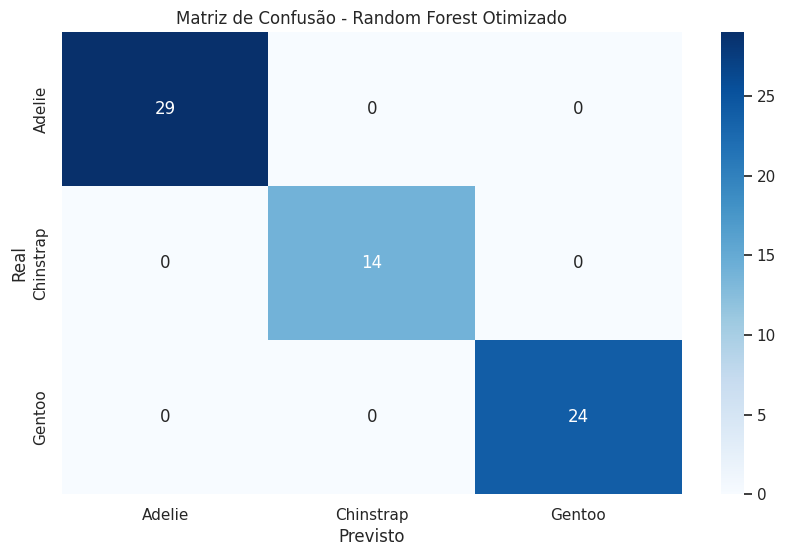

In [18]:
from sklearn.model_selection import GridSearchCV

# Definir grade de hiperpar√¢metros
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Instanciar modelo base
rf = RandomForestClassifier(random_state=42)

# GridSearch com valida√ß√£o cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Treinamento
grid_search.fit(X_treino, y_treino)

# Resultados
print("Melhores hiperpar√¢metros:")
print(grid_search.best_params_)

print("\nMelhor acur√°cia (valida√ß√£o cruzada):")
print(grid_search.best_score_)

# Avalia√ß√£o no conjunto de teste com o melhor modelo
melhor_modelo = grid_search.best_estimator_
avaliar_modelo(melhor_modelo, "Random Forest Otimizado")


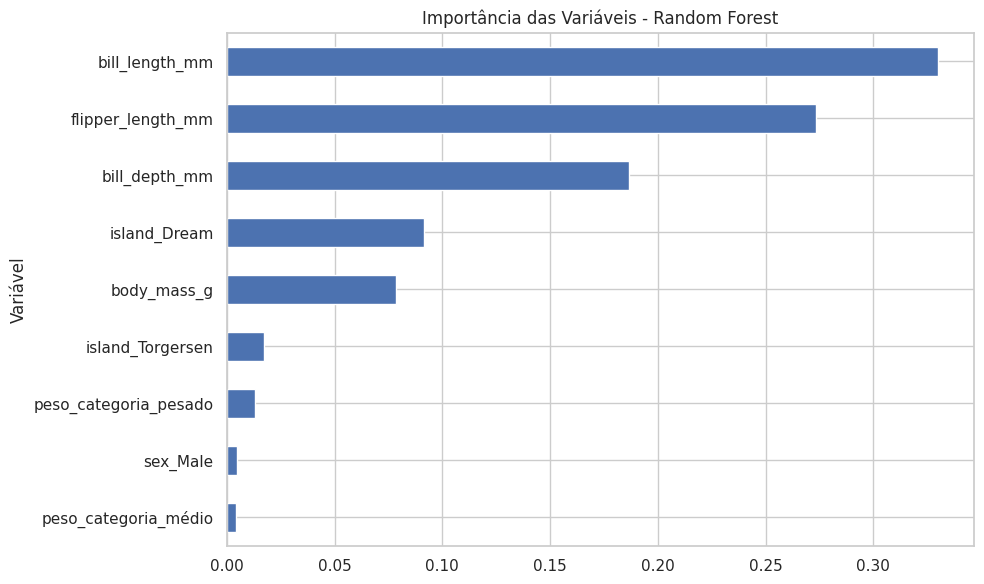

In [26]:
importances = melhor_modelo.feature_importances_
features = X.columns

# Visualizar
import pandas as pd
import matplotlib.pyplot as plt

df_importancia = pd.DataFrame({"Vari√°vel": features, "Import√¢ncia": importances})
df_importancia.sort_values("Import√¢ncia", ascending=True).plot.barh(x="Vari√°vel", y="Import√¢ncia", legend=False)
plt.title("Import√¢ncia das Vari√°veis - Random Forest")
plt.tight_layout()
plt.show()


Melhores hiperpar√¢metros para KNN:
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Melhor acur√°cia (valida√ß√£o cruzada):
1.0

üîç Avaliando: KNN Otimizado
Acur√°cia: 1.0000

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



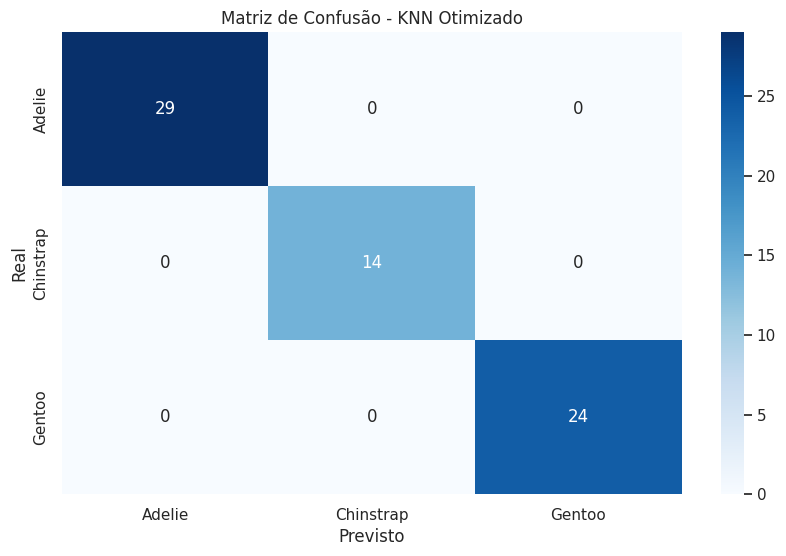

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Grade de hiperpar√¢metros para KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

# Instanciar o modelo base
knn_base = KNeighborsClassifier()

# Configurar o GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid_knn,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Treinar com os dados de treino
grid_search_knn.fit(X_treino, y_treino)

# Resultados
print("Melhores hiperpar√¢metros para KNN:")
print(grid_search_knn.best_params_)

print("\nMelhor acur√°cia (valida√ß√£o cruzada):")
print(grid_search_knn.best_score_)

# Avalia√ß√£o no conjunto de teste
melhor_knn = grid_search_knn.best_estimator_
avaliar_modelo(melhor_knn, "KNN Otimizado")


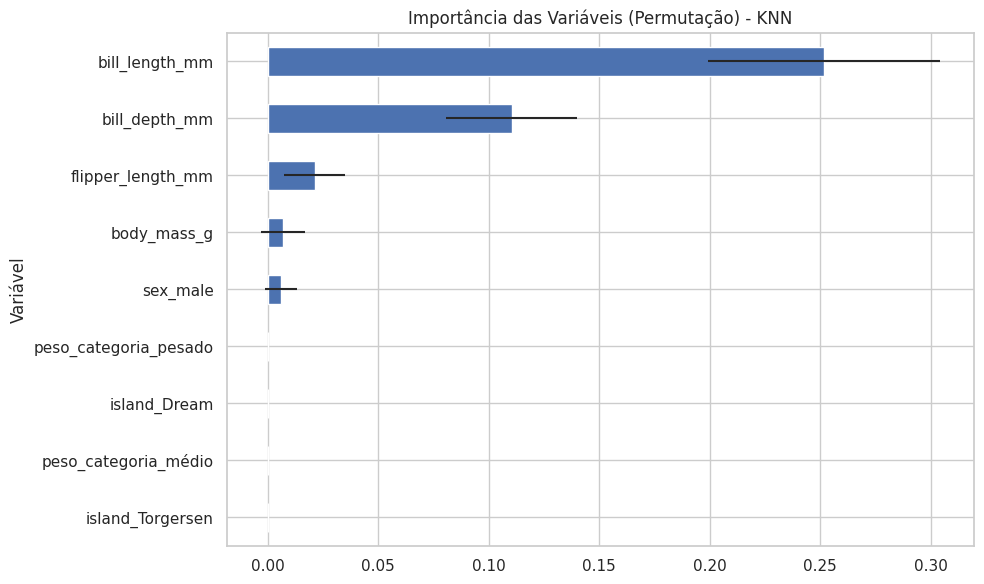

In [22]:
from sklearn.inspection import permutation_importance

# Avalia√ß√£o de import√¢ncia com base em permuta√ß√£o
resultado = permutation_importance(melhor_knn, X_teste, y_teste, n_repeats=30, random_state=42, scoring='accuracy')

# Organizar os dados
importancias = pd.DataFrame({
    "Vari√°vel": X.columns,
    "Import√¢ncia M√©dia": resultado.importances_mean,
    "Desvio": resultado.importances_std
}).sort_values(by="Import√¢ncia M√©dia", ascending=True)

# Gr√°fico
importancias.plot.barh(x="Vari√°vel", y="Import√¢ncia M√©dia", xerr="Desvio", legend=False)
plt.title("Import√¢ncia das Vari√°veis (Permuta√ß√£o) - KNN")
plt.tight_layout()
plt.show()


Acur√°cia: 0.9850746268656716
ROC AUC: 1.0

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



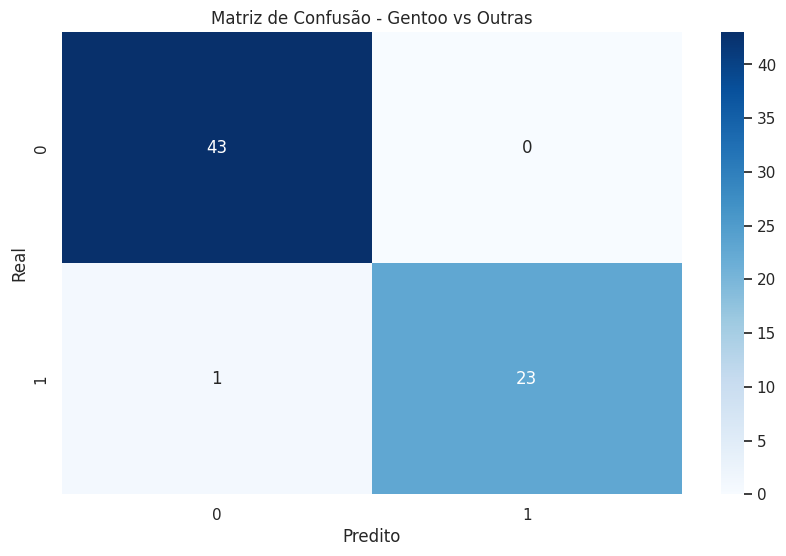

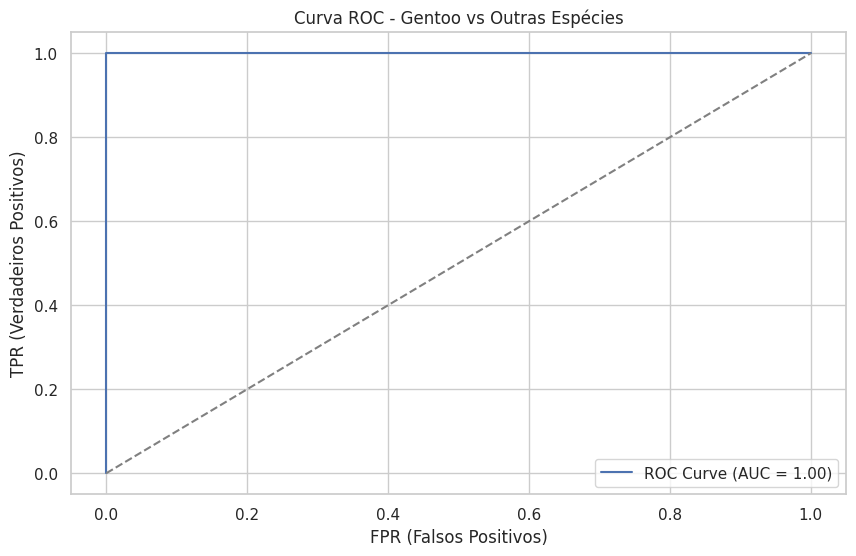

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# 1. Carregar e preparar dados
df = sns.load_dataset("penguins").dropna()

# Vari√°vel-alvo bin√°ria: 1 se Gentoo, 0 caso contr√°rio
df["is_gentoo"] = (df["species"] == "Gentoo").astype(int)

# One-hot encoding das vari√°veis categ√≥ricas
df = pd.get_dummies(df, columns=["island", "sex"], drop_first=True)

# Selecionar features
X = df[["bill_length_mm", "flipper_length_mm", "body_mass_g", "island_Dream", "island_Torgersen", "sex_Male"]]
y = df["is_gentoo"]

# Normaliza√ß√£o
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divis√£o treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.2)

# 2. Treinar modelo bin√°rio
modelo_binario = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_binario.fit(X_train, y_train)

# 3. Avalia√ß√£o
y_pred = modelo_binario.predict(X_test)
y_proba = modelo_binario.predict_proba(X_test)[:, 1]

print("Acur√°cia:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

# Matriz de confus√£o
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confus√£o - Gentoo vs Outras")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# 4. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("FPR (Falsos Positivos)")
plt.ylabel("TPR (Verdadeiros Positivos)")
plt.title("Curva ROC - Gentoo vs Outras Esp√©cies")
plt.legend()
plt.grid(True)
plt.show()


Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



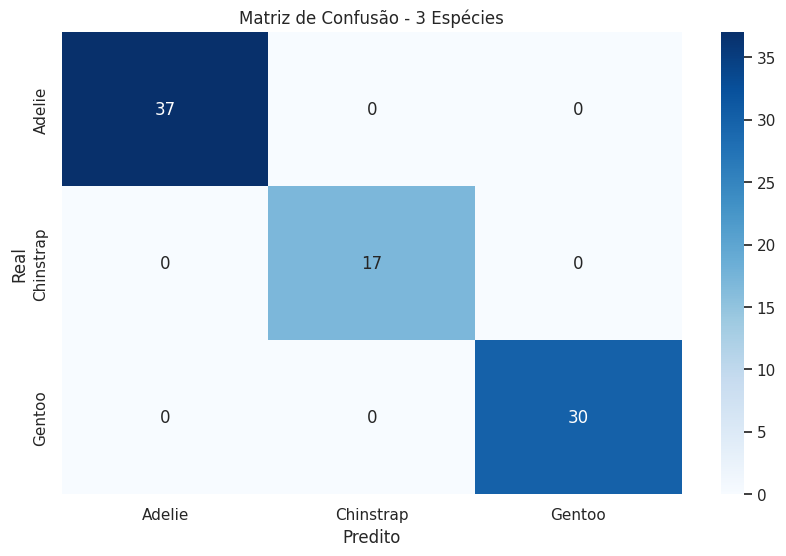

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Carregar dados
df = sns.load_dataset("penguins").dropna()
X = df.drop(columns=["species"])
y = df["species"]

# 2. Codificar vari√°veis categ√≥ricas
X = pd.get_dummies(X, drop_first=True)

# 3. Padronizar vari√°veis num√©ricas
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 4. Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 5. Treinar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# 6. Avalia√ß√£o
y_pred = modelo.predict(X_test)
print("Relat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de Confus√£o - 3 Esp√©cies")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()
